### Let's recreate the entrance exam question

#### We'll do steps one through five together, on your own time you complete the remaining steps.

1. Load **labeled_data.csv** (comma-separated values) as data matrix. First column in the matrix are the $x$-coordinate values, second column are the $y$-coordinate values, and the third (last column) are the label values (0 or 1). 
2. Create two matrices, one for each label, e.g. **L0_matrix**, and **L1_matrix**. In particulr, the L0_matrix only contains the $x$,$y$-coordinate values associated with label zero.
3. Create one scatter plot that shows the $(x,y)$ location of all the label zero (L0) values and shows the $(x,y)$ location of all the label one (L1) values. Color the L0 points "red" and the L1 points "blue".
4. Create two statistical models
    - Using the $(x,y)$ values in L0 create a statistical model that includes the mean of $\bar{x}$ and mean of $\bar{y}$ and their variance. 
    - Using the $(x,y)$ values in L1 create a statistical model that includes the mean of $\bar{x}$ and mean of $\bar{y}$ and their variance.
5. Load the two files
    - **Unlabeled_data.csv** as a data matrix. First column in the matrix are the $x$-coordinate values and second column are the $y$-coordinate values.
    - **labels.csv** as a data matrix. Only one column that defines the known label value for each $(x,y)$ data point in the unlabeled data matrix.
6. Using the two statistical models created in Step 4, assign each $(x,y)$ point in the unlabeled matrix to a labeled group, i.e. assign to label zero or one. This can be accomplished using a simple distance-based measure (such as Euclidean distance).
7. Calculate the accuracy of the approach using a 2x2 confusion matrix. Specifically, calculate the positive predictive value (PPV), negative predictive value (NPV), sensitivity, specificity, and $F_1$ score. Good reference (https://en.wikipedia.org/wiki/Confusion_matrix)
8. Create one scatter plot that shows the $(x,y)$ point locations in the unlabeled data that were mis-classified, i.e. assigned to the wrong label group. You decided the color and the marker shape.




In [1]:
# Add libraries here
import numpy as np
import matplotlib.pyplot as plt
import helpers as h

In [2]:
#create variables to debug code
STEP1_DEBUG = 0
STEP2_DEBUG = 0
STEP3_DEBUG = 0
STEP4_DEBUG = 0
STEP5_DEBUG = 0
STEP6_DEBUG = 0
STEP7_DEBUG = 0
STEP8_DEBUG = 0

In [3]:
# -------------------------------
# Step 1 (may need to change relative location of csv file)
# -------------------------------

Labeled_Data = np.genfromtxt("../data/labeled_data.csv", delimiter=',')
if STEP1_DEBUG:
    print( Labeled_Data)


In [4]:
# -------------------------------
# Step 2
# -------------------------------

L0=Labeled_Data[:,2]==0
L1=Labeled_Data[:,2]==1

L0_matrix=Labeled_Data[L0,0:2]
L1_matrix=Labeled_Data[L1,0:2]

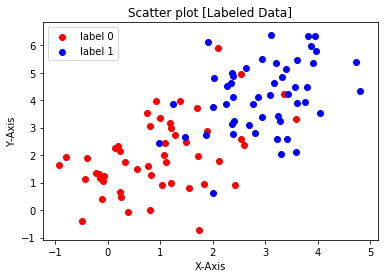

In [19]:
# -------------------------------
# Step 3
# -------------------------------

plt.figure()
plt.title( "Scatter plot [Labeled Data]")
plt.xlabel( "X-Axis" )
plt.ylabel( "Y-Axis" )
plt.scatter( L0_matrix[:,0], L0_matrix[:,1], color='red', marker='o', label="label 0")
plt.scatter( L1_matrix[:,0], L1_matrix[:,1], color='blue', marker='o', label="label 1")
plt.legend()
plt.show()

In [6]:
# -------------------------------
# Step 4
# -------------------------------
# model array format: [ mean x, mean y, var x, var y ]

model_L0 = [ np.mean( L0_matrix[:,0] ), np.mean( L0_matrix[:,1] ), np.var( L0_matrix[:,0] ), np.var( L0_matrix[:,1] )]
model_L1 = [ np.mean( L1_matrix[:,0] ), np.mean( L1_matrix[:,1] ), np.var( L1_matrix[:,0] ), np.var( L1_matrix[:,1] )]

if STEP4_DEBUG:
    print( model_L0 )
    print( model_L1 )

In [7]:
# -------------------------------
# Step 5
# -------------------------------

Unlabeled_Data = np.genfromtxt("../data/unlabeled_data.csv", delimiter=',')
Labels = np.genfromtxt("../data/labels.csv", delimiter=',')

if STEP5_DEBUG:
    print( Unlabeled_Data)
    print( Labels )
    print( Labels.shape )


In [9]:
# -------------------------------
# Step 6
# -------------------------------

Results=np.zeros( ( np.size( Labels,0 ), 2 ) )
Results[:,0]=Labels

for i in range( 0, np.size( Labels, 0 ) ):
    
    row = Unlabeled_Data[i,:]
    
    if h.eucdist( row, model_L0[0:2] ) > h.eucdist( row, model_L1[0:2] ):
        Results[i,1] = 1
        
if STEP6_DEBUG:
    print( Results )
    

In [33]:
# -------------------------------
# Step 7
# -------------------------------

confusion_matrix = np.zeros( ( 2 , 2 ) )

for row in Results:
    if row[0] == 0 and row[1] == 0:
        confusion_matrix[0,0] = confusion_matrix[0,0] + 1
    elif row[0] == 0 and row[1] == 1:
        confusion_matrix[1,0] = confusion_matrix[1,0] + 1
    elif row[0] == 1 and row[1] == 0:
        confusion_matrix[0,1] = confusion_matrix[0,1] + 1 
    else:
        confusion_matrix[1,1] = confusion_matrix[1,1] + 1   

print( "-----------------------------------" )
print( "Model Accuracy" )
print( "-----------------------------------" )
print( "PPV = {0:0.2f}".format( h.ppv( confusion_matrix ) ) )
print( "NPV = {0:0.2f}".format( h.npv( confusion_matrix ) ) )
print( "SEN = {0:0.2f}".format( h.sensitivity( confusion_matrix ) ) )
print( "SPC = {0:0.2f}".format( h.specificity( confusion_matrix ) ) )
print( "F1  = {0:0.2f}".format( h.f1( confusion_matrix ) ) )

-----------------------------------
Model Accuracy
-----------------------------------
PPV = 0.83
NPV = 0.79
SEN = 0.78
SPC = 0.84
F1  = 0.80


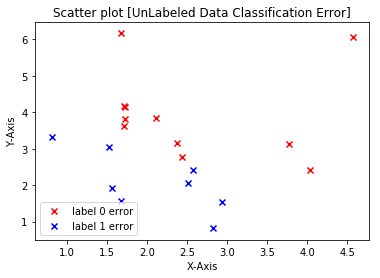

In [32]:
# -------------------------------
# Step 8
# -------------------------------

plt.figure()
plt.title( "Scatter plot [UnLabeled Data Classification Error]")
plt.xlabel( "X-Axis" )
plt.ylabel( "Y-Axis" )

Label_0_Error = np.empty( (0,2) )
Label_1_Error = np.empty( (0,2) )

for i in range( 0, np.size( Results, 0 ) ):
    
    point = Unlabeled_Data[i,:]
    result = Results[i,:]
    
    if ( result[0] == 0 ) and ( result[1] == 1 ):
        Label_0_Error = np.append( Label_0_Error, [ point ], axis=0 )
    elif ( result[0] == 1 ) and ( result[1] == 0 ):
        Label_1_Error = np.append( Label_1_Error, [ point ], axis=0 )
        
plt.scatter( Label_0_Error[:,0], Label_0_Error[:,1], color='red', marker='x', label="label 0 error" )
plt.scatter( Label_1_Error[:,0], Label_1_Error[:,1], color='blue', marker='x', label="label 1 error" )
plt.legend()
plt.show()